**Customer Segmentation using K-Means Clustering**

**1.Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


**2.Load Dataset**

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3. Exploring Dataset**

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**4. Preprocessing**

In [6]:
# Droping non-numeric or irrelevant columns
df_clean = df.drop(['CustomerID', 'Gender'], axis=1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


**5.Silhouette Score Method**

In [7]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):  # Silhouette is not defined for k=1
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'For k = {k}, Silhouette Score = {score:.3f}')


For k = 2, Silhouette Score = 0.335
For k = 3, Silhouette Score = 0.358
For k = 4, Silhouette Score = 0.404
For k = 5, Silhouette Score = 0.408
For k = 6, Silhouette Score = 0.431
For k = 7, Silhouette Score = 0.410
For k = 8, Silhouette Score = 0.367
For k = 9, Silhouette Score = 0.374
For k = 10, Silhouette Score = 0.362


**6. Train K-Means**

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Cluster labels to the dataframe
df['Cluster'] = clusters


**7. Visualize Clusters**

plotting clusters using two actual features like:

Annual Income (k$)

Spending Score (1–100)

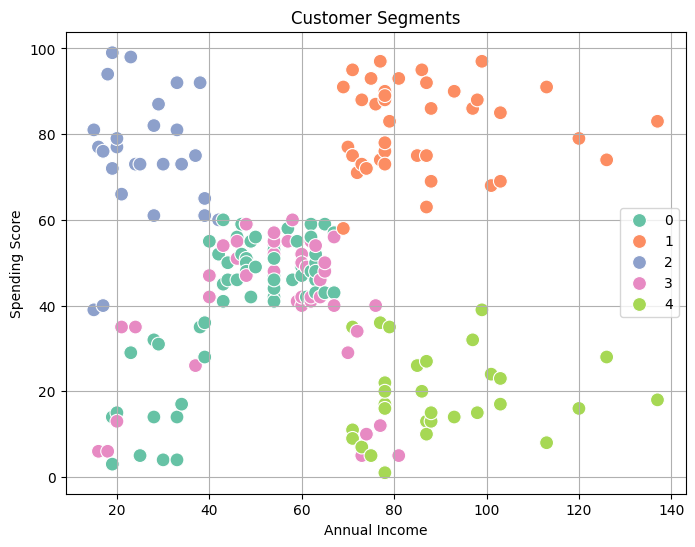

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()


**8. PCA for 2D Clustering View**

PCA lets you compress 4D or 5D clusters into 2D, so you can see what your algorithm is doing.

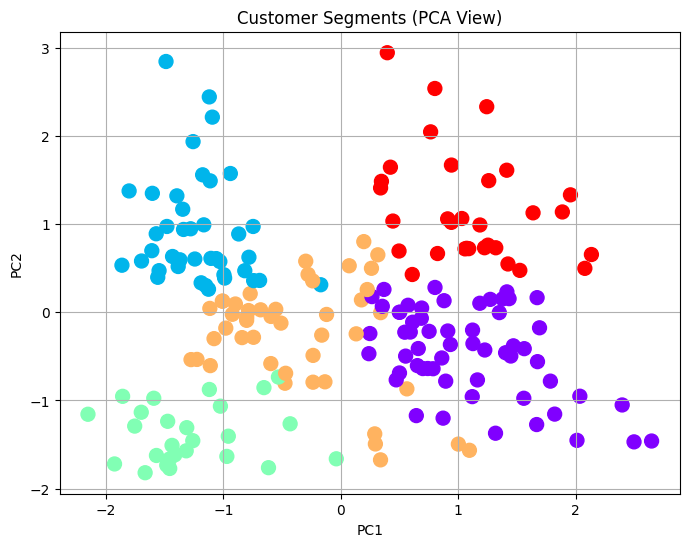

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', s=100)
plt.title('Customer Segments (PCA View)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()
